# Project Completed by Leila Pan, Wesley Mui, Alan Thai

In [336]:
#LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [337]:
#CSV FILES

education=pd.read_csv('education.csv')
income=pd.read_csv('income.csv')
poverty=pd.read_csv('poverty.csv')
race=pd.read_csv('share_race_by_city.csv')
police_killing_test=pd.read_csv('police_killings_test.csv')
police_killing_train=pd.read_csv('police_killings_train.csv')


# EDA

## Cleaning up data: Leila Pan

We deleted rows in the killing and training data if it is missing value in any of the column

We also deleted rows in the share_race_by_city.csv that contains non numerical values 

In [338]:
#CLEANING UP DATA WITH EMPTY/INVALID VALUES 

police_killing_test.dropna(inplace=True)
police_killing_train.dropna(inplace=True)

#DISREGARDING INVALID VALUES
race=race[pd.to_numeric(race['share_white'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_black'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_native_american'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_asian'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_hispanic'],errors='coerce').notnull()]

## Merging Data: Leila Pan

We combined share_race_by_city.csv, poverty.csv, education.csv, and income.csv by city names. The merged data set contains all the information for each city in one data set. 

In [339]:
#MERGING DATA

merged_data=pd.merge(education,income, on =['Geographic Area','City'])
merged_data=pd.merge(merged_data,poverty, on =['Geographic Area','City'])
race=race.rename(columns={'Geographic area':'Geographic Area'})
merged_data=pd.merge(merged_data,race, on =['Geographic Area','City'])
#display(HTML(merged_data.to_html()))

## Which state has the most fatal police shootings?: Leila Pan, Wesley Mui

We calculate and visualize the states with the most number of fatal police shootings by using data from police_killing_train.csv and police_killing_test.csv


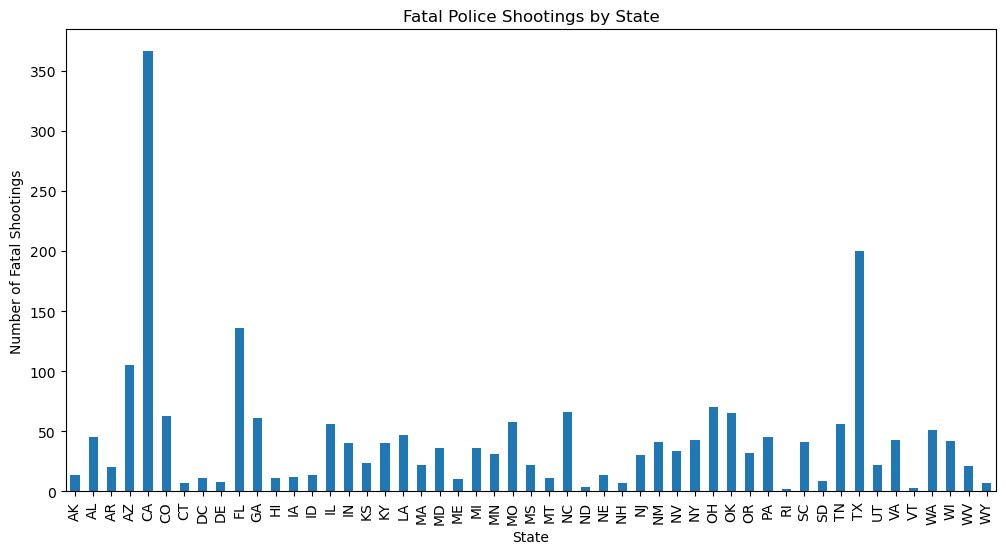

The state with the most fatal police shootings is CA with 366 fatal shootings.


In [340]:
#Which state has the most fatal police shootings?

state_counts_test = police_killing_test['state'].value_counts()
state_counts_train= police_killing_train['state'].value_counts()

state_counts=pd.concat([state_counts_test,state_counts_train],axis=0)
state_counts=state_counts.groupby(state_counts.index).sum()

plt.figure(figsize=(12,6))
state_counts.plot(kind='bar')
plt.title('Fatal Police Shootings by State')
plt.xlabel('State')
plt.ylabel('Number of Fatal Shootings')

plt.show()
most_fatal_state = state_counts.idxmax()
print(f'The state with the most fatal police shootings is {most_fatal_state} with {state_counts[most_fatal_state]} fatal shootings.')

## Which city is the most dangerous?: Leila Pan, Wesley Mui

We were not provided data about crime done in certain cities. Using the data provided, we measure the most dangrous city by the frequency of fatal police shooting. We organize the fatal shootings by cities and listed the top 5 most "dangerous" cities.

Top 10 most 'dangerous' cities according the number of fatalities:
Los Angeles    35
Phoenix        28
Houston        24
Chicago        22
Austin         18
Las Vegas      17
Columbus       16
San Antonio    15
Miami          15
St. Louis      14
Name: city, dtype: int64


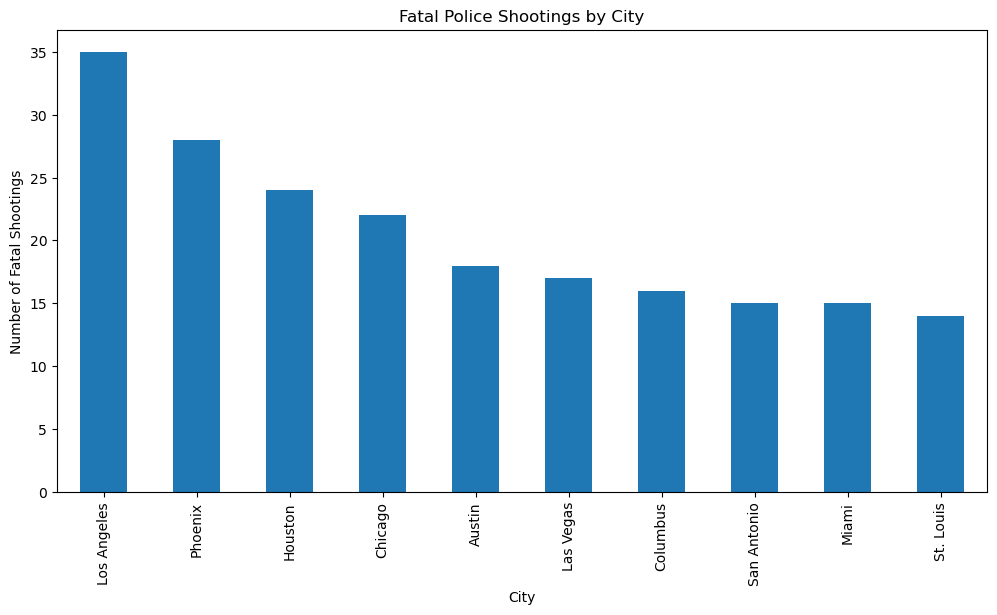

In [341]:
#Which city is the most dangerous?

city_counts_test=police_killing_test['city'].value_counts()
city_counts_train=police_killing_train['city'].value_counts()

city_counts=pd.concat([city_counts_test,city_counts_train],axis=0)
city_counts=city_counts.groupby(city_counts.index).sum()

city_counts=city_counts.sort_values(ascending=False)
print("Top 10 most 'dangerous' cities according the number of fatalities:")
print(city_counts.head(10))

plt.figure(figsize=(12,6))
city_counts.head(10).plot(kind='bar')
plt.title('Fatal Police Shootings by City')
plt.xlabel('City')
plt.ylabel('Number of Fatal Shootings')

plt.show()

## What is the age distribution of the victims? Compare age distribution of different races. Wesley Mui

Below is the general age distribution of shooting victims.

Text(0.5, 1.0, 'General Age Distribution of Shooting Victims')

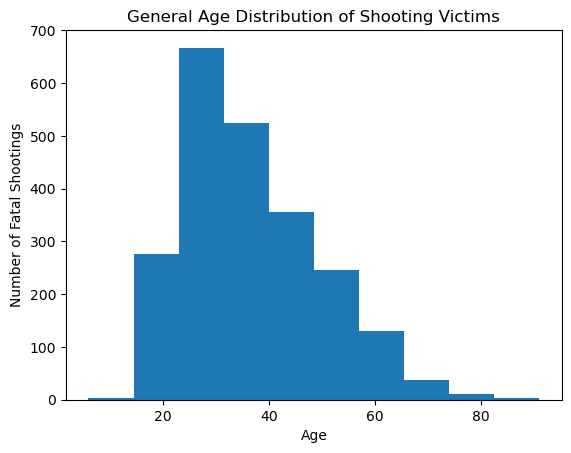

In [342]:
frames = [police_killing_test, police_killing_train]
killings = pd.concat(frames, ignore_index=True)
ages = killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.ylabel('Number of Fatal Shootings')
plt.title("General Age Distribution of Shooting Victims")

Overall, most shooting victims are between the ages of 20-40 years of age.

Text(0.5, 1.0, 'Age Distribution of Shooting Victims [B]')

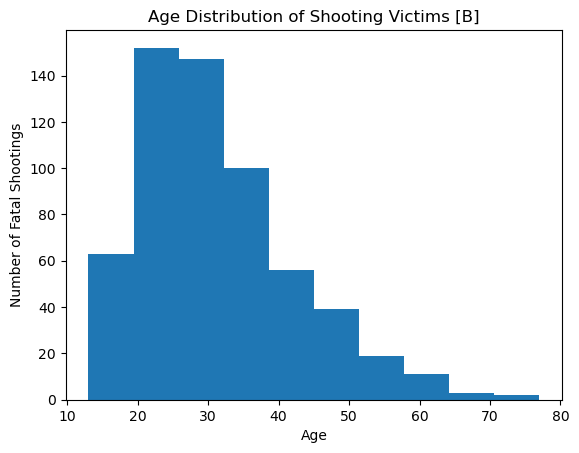

In [343]:
b_killings = killings[killings["race"] == 'B']
ages = b_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.ylabel('Number of Fatal Shootings')
plt.title("Age Distribution of Shooting Victims [B]")

Most shooting victims that are black tend to be younger, with majority of shooting victims in their 20s and 30s.

Text(0.5, 1.0, 'Age Distribution of Shooting Victims [W]')

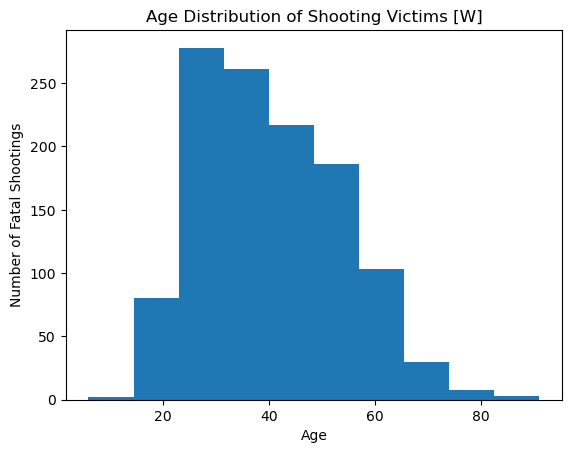

In [344]:
w_killings = killings[killings["race"] == 'W']
ages = w_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.ylabel('Number of Fatal Shootings')
plt.title("Age Distribution of Shooting Victims [W]")

Shooting victims that are white also tend to be very young, with most victims around 20-40 years of age.

Text(0.5, 1.0, 'Age Distribution of Shooting Victims [H]')

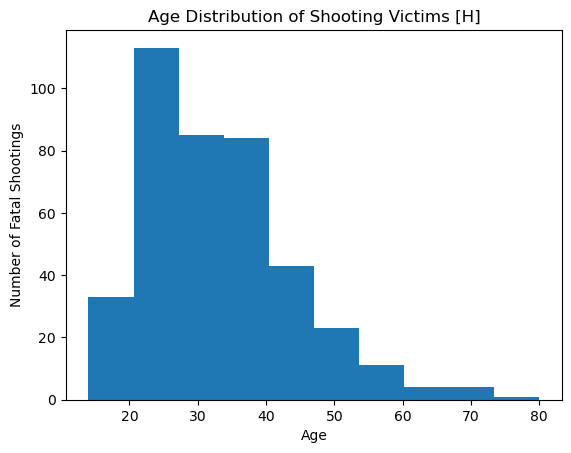

In [345]:
h_killings = killings[killings["race"] == 'H']
ages = h_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.ylabel('Number of Fatal Shootings')

plt.title("Age Distribution of Shooting Victims [H]")

Shooting victims that are Hispanic also tend to be much younger with majority of victims in their 20s.

Text(0.5, 1.0, 'Age Distribution of Shooting Victims [A]')

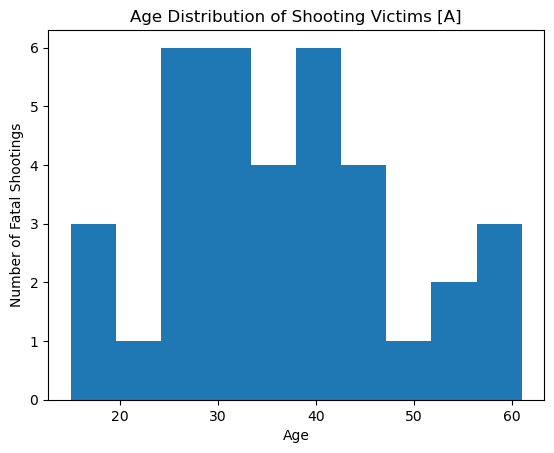

In [346]:
a_killings = killings[killings["race"] == 'A']
ages = a_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.ylabel('Number of Fatal Shootings')

plt.title("Age Distribution of Shooting Victims [A]")

Shooting victims that are Asian have a more scattered distribution, with most victims in their 30s and 40s.

Text(0.5, 1.0, 'Age Distribution of Shooting Victims [N]')

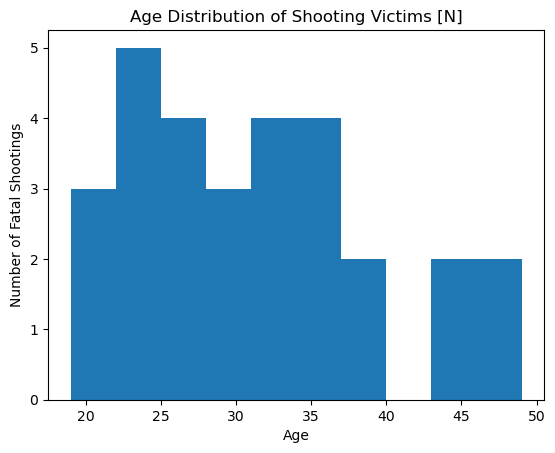

In [347]:
n_killings = killings[killings["race"] == 'N']
ages = n_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.ylabel('Number of Fatal Shootings')

plt.title("Age Distribution of Shooting Victims [N]")

Shooting victims that are Native American also have a similarly scattered distribution in terms of age, with majority in their 20s.

Text(0.5, 1.0, 'Age Distribution of Shooting Victims [O]')

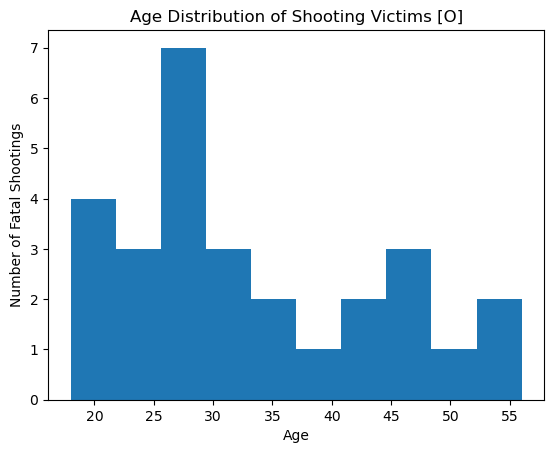

In [348]:
o_killings = killings[killings["race"] == 'O']
ages = o_killings["age"]
ages.plot(kind='hist')
plt.xlabel("Age")
plt.ylabel('Number of Fatal Shootings')

plt.title("Age Distribution of Shooting Victims [O]")

Shooting victims of the "Other" race also have majority of their victims in their 20s.

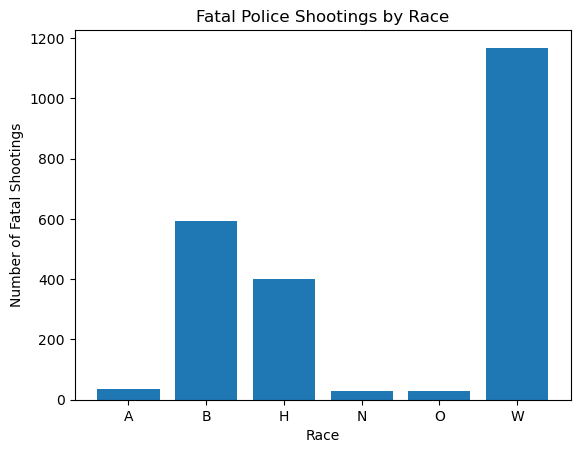

The most common race fatally shot by police is white


In [349]:
#Compare the total number of people killed per race.

total_killed_test=police_killing_test['race'].value_counts()
total_killed_train=police_killing_train['race'].value_counts()

total_killed=pd.concat([total_killed_test,total_killed_train],axis=0)
total_killed=total_killed.groupby(total_killed.index).sum().reset_index()
#print(total_killed)


plt.bar(total_killed['index'],total_killed['race'])
plt.title('Fatal Police Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Number of Fatal Shootings')
plt.show()

print("The most common race fatally shot by police is white")

## Comparing the number of people killed per race with respect to proportion of races in each state. : Leila Pan

We compare the number of people killed per race to proportion of respective races in each state. We found the proportion of race killed in each state and the overall propoertion of race in each state. We then extracted the most common race for each state in respect to both data sets. We then and compared how similar the results were.

In [350]:
#OVERALL:Compare the number of people killed per race as a proportion of respective races.

#merging police killing test and training data
police_killing_test_reduced = police_killing_test[['state', 'city', 'race']]
police_killing_train_reduce = police_killing_train[['state','city','race']]
merged_police_killing=pd.concat([police_killing_test_reduced,police_killing_train_reduce])


#organize can catergorize the killings by state and race
grouped=merged_police_killing.groupby(['state', 'city', 'race']).size().unstack(fill_value=0)


grouped.columns = ['asian', 'black', 'hispanic', 'native_american','other', 'white']
grouped = grouped.reset_index()
grouped=grouped.groupby('state').sum()
 

#finding out the demographic percentage of race fatally shot with respect to states
total=grouped.sum(axis=1)
percentages=grouped.apply(lambda x:round(x/total*100,1))
percentages=percentages.sort_values(by="state")

print("Proportion of race killed in each state:")
display(HTML(percentages.to_html()))

Proportion of race killed in each state:


,asian,black,hispanic,native_american,other,white
state,,,,,,
AK,0.0,7.1,0.0,42.9,0.0,50.0
AL,0.0,31.1,0.0,0.0,0.0,68.9
AR,0.0,25.0,0.0,0.0,0.0,75.0
AZ,0.0,4.8,34.3,7.6,0.0,53.3
CA,3.8,16.9,43.4,0.3,2.2,33.3
CO,3.2,12.7,33.3,1.6,0.0,49.2
CT,0.0,0.0,28.6,0.0,0.0,71.4
DC,0.0,90.9,0.0,0.0,0.0,9.1
DE,0.0,50.0,0.0,0.0,0.0,50.0


In [351]:
#created a data set that find the average demographic percentage across each state
state_demographic=pd.DataFrame(columns=['state','asian','black','hispanic','native_american','white'])
current_state=race.iloc[0]['Geographic Area']
whiteMean=0.0
blackMean=0.0
naMean=0.0
asianMean=0.0
hispanicMean=0.0
lastIndex=-1
for index, row in race.iterrows():
    this_state=row['Geographic Area']
    if this_state!=current_state:
        n=index-lastIndex
        lastIndex=index
        state_demographic = pd.concat([state_demographic, pd.DataFrame({'state': current_state,
                                                                      'white': round((whiteMean/n),1),
                                                                      'black': round((blackMean/n),1),
                                                                      'native_american': round((naMean/n),1),
                                                                      'asian': round((asianMean/n),1),
                                                                      'hispanic': round((hispanicMean/n),1)}, index=[0])])
        state_demographic = state_demographic.reset_index(drop=True)
        whiteMean=float(row['share_white'])
        blackMean=float(row['share_black'])
        naMean=float(row['share_native_american'])
        asianMean=float(row['share_asian'])
        hispanicMean=float(row['share_hispanic'])
        
        current_state=this_state
        
    else:
        whiteMean+=float(row['share_white'])
        blackMean+=float(row['share_black'])
        naMean+=float(row['share_native_american'])
        asianMean+=float(row['share_asian'])
        hispanicMean+=float(row['share_hispanic'])

state_demographic=state_demographic.sort_values(by="state")
state_demographic.reset_index(drop=True, inplace=True)

print("Overall proportion of race in each state:")
display(HTML(state_demographic.to_html()))

Overall proportion of race in each state:


,state,asian,black,hispanic,native_american,white
0,AK,1.4,0.6,2.1,45.5,45.3
1,AL,0.5,23.3,3.0,0.7,72.4
2,AR,0.5,16.3,4.3,0.8,78.4
3,AZ,0.7,1.0,20.1,28.6,59.9
4,CA,5.5,2.7,29.5,1.7,71.5
5,CO,1.2,0.9,17.9,1.6,87.8
6,CT,3.0,5.0,8.0,0.7,86.1
7,DC,3.5,50.7,9.1,0.3,38.5
8,DE,2.0,15.4,7.4,0.5,76.2
9,FL,1.6,13.4,16.5,0.5,78.7


In [352]:
#find the most common race fatally shot in each state
max_cols_percentages = percentages.idxmax(axis=1)
print("Most common race fatally shot in each state:")
print(max_cols_percentages,'\n')

Most common race fatally shot in each state:
state
AK              white
AL              white
AR              white
AZ              white
CA           hispanic
CO              white
CT              white
DC              black
DE              black
FL              white
GA              white
HI              other
IA              white
ID              white
IL              black
IN              white
KS              white
KY              white
LA              black
MA              white
MD              black
ME              white
MI              white
MN              white
MO              white
MS              white
MT              white
NC              white
ND    native_american
NE              white
NH              white
NJ              black
NM           hispanic
NV              white
NY              black
OH              white
OK              white
OR              white
PA              white
RI              black
SC              white
SD              white
TN              white
TX 

In [353]:
#find the most common race in each state
state_demographic = state_demographic.reset_index(drop=True)
state_demographic.set_index("state", inplace=True)
max_cols_state_demographic = state_demographic.idxmax(axis=1)
print("Most common race in each state:")
print(max_cols_state_demographic,'\n')

Most common race in each state:
state
AK    native_american
AL              white
AR              white
AZ              white
CA              white
CO              white
CT              white
DC              black
DE              white
FL              white
GA              white
HI              white
IA              white
ID              white
IL              white
IN              white
KS              white
KY              white
LA              white
MA              white
MD              white
ME              white
MI              white
MN              white
MO              white
MS              white
MT              white
NC              white
ND              white
NE              white
NH              white
NJ              white
NM              white
NV              white
NY              white
OH              white
OK              white
OR              white
PA              white
RI              white
SC              white
SD              white
TN              white
TX              

In [354]:
#compare the most common race fatally shot and most common race for differences 
set1 = set(max_cols_percentages)
set2 = set(max_cols_state_demographic)

intersection = len(set1.intersection(set2))
union = len(set1.union(set2))

jaccard_similarity = intersection/union
print("Percentage similarity between the two data sets:",jaccard_similarity*100,"%")


Percentage similarity between the two data sets: 60.0 %


The percentage similarity between the proportion of race most common in each state and the proportion of race being killed in each state is 60% This shows that there is some mismatch with the most common race and most common race being shot. This information alone does not provide enough context to draw any specific conclusions about the datasets. However, it could potentially suggest that there are racial disparities in police shootings or other factors that contribute to differences between the most common race in a state and the most common race shot in a state. More analysis would be needed to make any definitive conclusions.

# Modeling and Question Answering - Done by Alan Thai

For this project we have chosen to use K-Nearest Neighbors, Neural Networks, and Linear Regression Algorithms to try and predict.

K-nearest neighbors: This is a simple algorithm for both regression and classification problems, which works by finding the K nearest samples to a given query point in the input feature space, and making predictions based on the average (for regression) or mode (for classification) of their output values.

Neural Networks: This is a machine learning algorithm inspired by the structure of the brain. It consists of layers of interconnected neurons that learn to extract useful features from the input data and make predictions based on them. The process of learning involves adjusting the weights of the connections between the neurons based on the errors between the predicted and actual values.

Linear regression: This is a simple algorithm for regression problems, which tries to find the best linear relationship between a set of input features and a continuous output variable. Linear regression works by minimizing the sum of squared differences between the predicted values and the actual values.

In [355]:
# Import the necessary libraries for K-Nearest Neighbors and Neural Networks classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# apply label encoding to all columns in both datasets so they can be understood by our models
for col in police_killing_train.columns:
    if police_killing_train[col].dtype == 'object':
        le = LabelEncoder()
        police_killing_train[col] = le.fit_transform(police_killing_train[col])
        
for col in police_killing_test.columns:
    if police_killing_test[col].dtype == 'object':
        le = LabelEncoder()
        police_killing_test[col] = le.fit_transform(police_killing_test[col])

print(police_killing_train.head())

# Prepare the data by separating the features and the target variable
# Drop the 'race' column from the 'police_killings_train' dataset to create the feature matrix 'X_train'
# Set the 'race' column as the target variable 'y_train'
X_train = police_killing_train.drop(columns=['race'])
y_train = police_killing_train['race']

# Drop the 'race' column from the 'police_killings_test' dataset to create the feature matrix 'X_test'
X_test = police_killing_test.drop(columns=['race'])

# K-Nearest Neighbors (KNN) Algorithm
# Create a KNeighborsClassifier object with n_neighbors=5 and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data using knn.predict() and assign the results to y_pred
y_pred_knn = knn.predict(X_test)

# Neural Networks Algorithm
# Create an MLPClassifier object with one hidden layer of 100 neurons and fit it to the training data
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X_train, y_train)

# Make predictions on the test data using mlp.predict() and assign the results to y_pred
y_pred_mlp = mlp.predict(X_test)

# Linear Regression Algorithm
# Create a LinearRegression object and fit it to the training data
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test data using linear_reg.predict() and assign the results to y_pred
y_pred_lin = linear_reg.predict(X_test)

   id  name  date  manner_of_death  armed   age  gender  race  city  state  \
0   3  1757    21                0     22  53.0       1     0   917     47   
1   4  1159    21                0     22  47.0       1     5    15     37   
2   5   932    45                1     58  23.0       1     2  1090     16   
3   8  1255    68                0     57  32.0       1     5   885      4   
4   9  1311    68                0     41  39.0       1     2   313      5   

   signs_of_mental_illness  threat_level  flee  body_camera  
0                     True             0     2        False  
1                    False             0     2        False  
2                    False             1     2        False  
3                     True             0     2        False  
4                    False             0     2        False  


/Users/wesleymui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Find the accuracy of the models:

In [356]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# inverse transform the label encoded target variable
le = LabelEncoder()
le.fit(police_killing_train['race'])
y_test = le.inverse_transform(police_killing_test['race'])

# K-Nearest Neighbors (KNN) Algorithm
acc_knn = accuracy_score(y_test, y_pred_knn)
print('KNN accuracy:', acc_knn)

# Neural Networks Algorithm
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print('Neural Networks accuracy:', acc_mlp)

# Linear Regression Algorithm
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred_lin)
print("R-squared value:", r2)

KNN accuracy: 0.0110803324099723
Neural Networks accuracy: 0.22437673130193905
R-squared value: -0.04989721763362942


Based on the given accuracies and R-squared value, it can be concluded that neither KNN nor Neural Networks models are effective in predicting the race given police killings data. The KNN accuracy indicates that the model is only slightly better than random guessing, while the Neural Networks accuracy is only slightly better than KNN but still relatively low.

Additionally, the negative R-squared value indicates that the linear regression model is not a good fit for the data, as it is predicting worse than the mean of the target variable.

Therefore, it can be concluded that the given data may not have enough information to effectively predict the race of individuals involved in police killings. It may be necessary to explore additional variables and data sources to improve the accuracy of such predictions.

Visualize results:

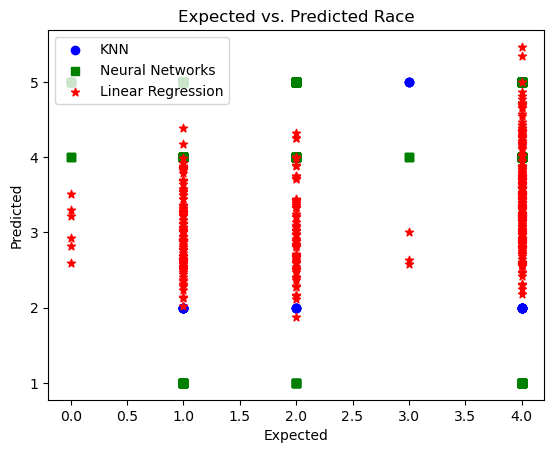

In [357]:
# Create a scatterplot showing the expected vs predicted results of the models
plt.scatter(y_test, y_pred_knn, color='blue', marker='o', label='KNN')
plt.scatter(y_test, y_pred_mlp, color='green', marker='s', label='Neural Networks')
plt.scatter(y_test, y_pred_lin, color='red', marker='*', label='Linear Regression')

# Add labels and legend to the plot
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Expected vs. Predicted Race')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In the scatter plot above, the numbers represent the label encoded races that our models used to predict.